# state Schema using Pydantic for data validation 

In [1]:
from langgraph.graph import StateGraph,START,END
from pydantic import BaseModel

In [2]:
# state
class state(BaseModel):
    name:str
    age:int

In [3]:
def display_info(state:state)->state:
    return {'name':state.name+ 'Abbasi','age':state.age +2}

In [4]:
graph=StateGraph(state)
graph.add_node('display',display_info)
graph.add_edge(START,'display')
graph.add_edge('display',END)
workflow=graph.compile()

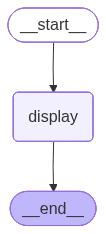

In [5]:
workflow

In [7]:
workflow.invoke({'name':'Talha','age':3})

{'name': 'TalhaAbbasi', 'age': 5}

In [8]:
workflow.invoke({'name':123})

ValidationError: 2 validation errors for state
name
  Input should be a valid string [type=string_type, input_value=123, input_type=int]
    For further information visit https://errors.pydantic.dev/2.11/v/string_type
age
  Field required [type=missing, input_value={'name': 123}, input_type=dict]
    For further information visit https://errors.pydantic.dev/2.11/v/missing